In [58]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

In [118]:
def pad(im, method="clip", padding=0):
    im_pad = np.zeros((im.shape[0] + 2 * padding, im.shape[1] + 2 * padding, im.shape[2]), dtype=np.uint8)
    if method == "clip":
        im_pad[padding:im_pad.shape[0]-padding, padding:im_pad.shape[1]-padding] = im
    else:
        raise ValueError(f"Not supported method {method!r}")
    return im_pad


def gaussian_function_2d_particular(x, sigma=1.0):
    return np.exp(-0.5 * (1 / sigma) * (x * x).sum()) / (2 * sigma * np.pi)


def generate_gaussian_kernel(kernel_size, sigma=1.0):
    side = (kernel_size - 1) / 2
    x, y = np.meshgrid(np.arange(kernel_size) - side, np.arange(kernel_size) - side)
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i, j] = gaussian_function_2d_particular(np.array([x[i, j], y[i, j]]), sigma=sigma)
    return kernel


def convolve(input, kernel):
    padding = kernel.shape[0] - 1
    output = np.zeros((input.shape[0] - padding, input.shape[1] - padding, input.shape[2]))
    for c in range(input.shape[2]):
        output[..., c] = convolve2d(input[..., c], kernel, mode="valid")
    return output


(23, 23)
0.9999753
(538, 553, 3)
(560, 575, 3)


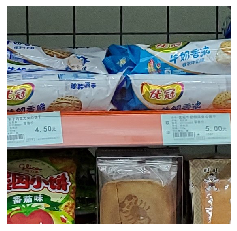

In [131]:
filter = generate_gaussian_kernel(23, sigma=7)
print(filter.shape)
print(filter.sum())
im = np.array(Image.open("image.jpg"))
im_pad = pad(im, method="clip", padding=11)
print(im.shape)
print(im_pad.shape)
plt.gca().set_axis_off()
plt.imshow(im)

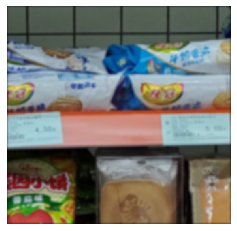

In [132]:
output = convolve(im_pad, filter)
plt.gca().set_axis_off()
plt.imshow(output.astype(np.uint8))